In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_path = "../../data/training_aisdk.csv"
data = pd.read_csv(file_path)

# Ensure the 'cri' column exists
if "ves_cri" not in data.columns:
    raise ValueError("The dataset does not contain a column named 'ves_cri'.")

# Check for invalid values in 'cri'
if data["ves_cri"].isnull().any():
    raise ValueError(
        "The 'ves_cri' column contains NaN values. Please handle them before running this script."
    )
if not ((data["ves_cri"] >= 0) & (data["ves_cri"] <= 1)).all():
    raise ValueError("The 'ves_cri' column contains values outside the range [0, 1].")

In [23]:
# Define bins and labels
bins = np.arange(0, 1.1, 0.1)
labels = [f"{bins[i]:.1f} - {bins[i+1]:.1f}" for i in range(len(bins) - 1)]

# Categorize 'cri' values into bins
data["cri_range"] = pd.cut(
    data["ves_cri"], bins=bins, labels=labels, include_lowest=True
)

# Calculate counts and percentages
counts = data["cri_range"].value_counts().sort_index()
total_count = len(data)
percentages = (counts / total_count * 100).round(2)

# Print results
print("Range\tCount\tPercentage")
for range_label, count, percentage in zip(counts.index, counts, percentages):
    print(f"{range_label}\t{count}\t{percentage}%")

# Print the maximum ves_cri value
max_ves_cri = data["ves_cri"].max()
print(f"Maximum ves_cri value: {max_ves_cri}")

Range	Count	Percentage
0.0 - 0.1	114987	38.32%
0.1 - 0.2	0	0.0%
0.2 - 0.3	5	0.0%
0.3 - 0.4	297	0.1%
0.4 - 0.5	1187	0.4%
0.5 - 0.6	2502	0.83%
0.6 - 0.7	3546	1.18%
0.7 - 0.8	6005	2.0%
0.8 - 0.9	111123	37.03%
0.9 - 1.0	60446	20.14%
Maximum ves_cri value: 0.9994521290729004


Text(0.5, 1.0, 'CRI Density Plot (NEW)')

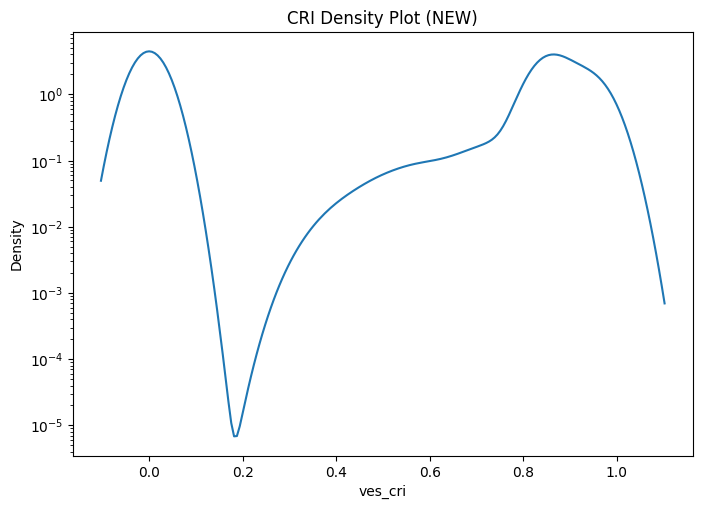

In [24]:
fig, ax = plt.subplots(figsize=(8, 5.5))

sns.kdeplot(data=data, x="ves_cri", ax=ax)
ax.set_yscale("log")
ax.set_title("CRI Density Plot (NEW)")